<a href="https://colab.research.google.com/github/shreyas-sridhar/Logistic_Regression/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shreyas S
ENG21CS0389

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/Credit_card.csv')
print(df['Propert_Owner'].value_counts())
print(df['Propert_Owner'].value_counts() * 150 / df.shape[0])
df.head()

Y    1010
N     538
Name: Propert_Owner, dtype: int64
Y    97.868217
N    52.131783
Name: Propert_Owner, dtype: float64


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
def sigmoid(x):
    return pd.Series(1 / ( 1 + np.exp(-x)))

In [ ]:
df['Propert_Owner'].describe()

count     1548
unique       2
top          Y
freq      1010
Name: Propert_Owner, dtype: object

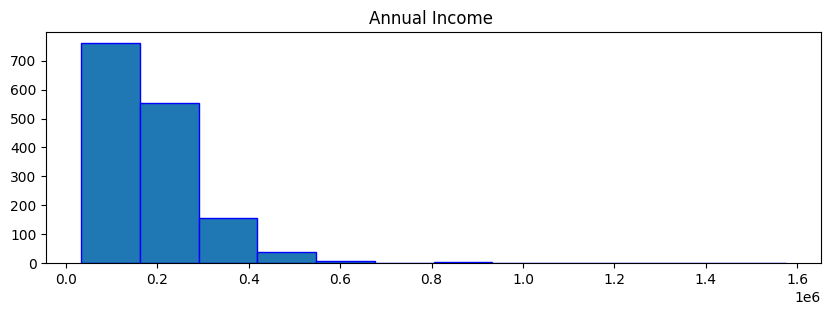

In [ ]:
plt.figure(figsize = (10,3), dpi = 100)
plt.title("Annual Income ")
plt.hist(df['Annual_income'], bins = 'sturges', edgecolor = 'blue')
plt. show()

In [ ]:
AnnualIncome_sig_output = sigmoid(df['Annual_income'])
AnnualIncome_sig_output.describe()

count    1525.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Annual_income, dtype: float64

In [ ]:
def standard_scalar(series):
    new_series = (series - series.mean()) / series.std()
    return new_series
scaled_Annual_Income = standard_scalar(df['Annual_income'])
scaled_AnnualIncome_sig_output = sigmoid(scaled_Annual_Income)
scaled_AnnualIncome_sig_output.describe()

count    1525.000000
mean        0.485106
std         0.173461
min         0.199087
25%         0.350419
50%         0.445256
75%         0.573632
max         0.999995
Name: Annual_income, dtype: float64

In [ ]:
def predict(sig_output, threshold):
    y_pred = [ 1 if output >= threshold else 0 for output in sig_output]
    return pd.Series(y_pred)

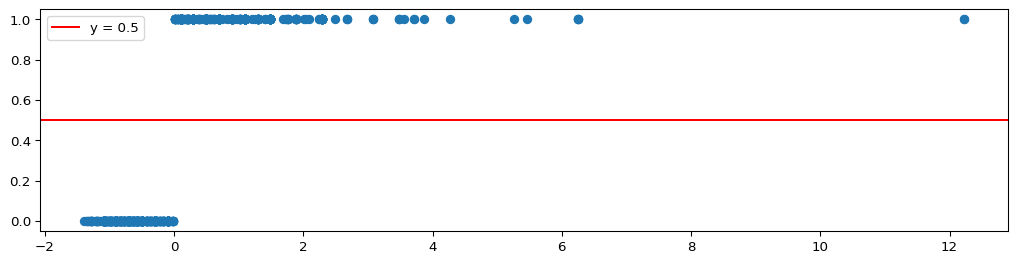

In [ ]:
threshold = 0.5
Credit_Card_fraud = predict(scaled_AnnualIncome_sig_output, threshold)

plt.figure(figsize=(13,3), dpi = 96)
plt.scatter(scaled_Annual_Income, Credit_Card_fraud)
plt.axhline(y = threshold, label = f'y = { threshold }', color = 'r')
plt. legend()
plt.show()